# Dictionary Learning
Greatly inspired by this [sklearn example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html)

In [14]:
import numpy as np
from skimage import color
import matplotlib.pyplot as plt
from sklearn import decomposition

import sys
sys.path.append('..')
from src.features.serialization import load_features

Read data and turn into numpy array of 0 to 1 floats

In [21]:
df = load_features()

imgs = np.stack(df["image"][:1000]) # <- currently limiting data arbitrarily because full data takes up 22GB as 64-bit floats
imgs = imgs / 255
faces = color.rgb2gray(imgs)
image_shape = faces.shape[1:]
faces = faces.reshape(faces.shape[0], -1)
faces.shape

(1000, 40000)

In [29]:
n_row, n_col = 4, 5

In [30]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(
            comp.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)

Extracting the top 20 Components - Dictionary Learning...


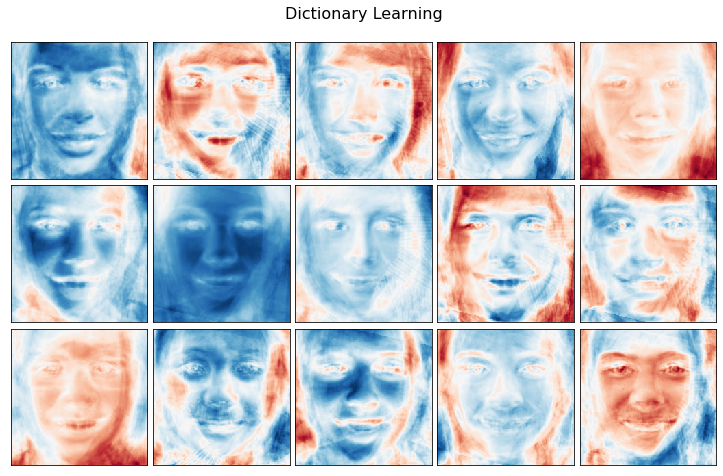

In [31]:
n_components = n_row * n_col
name = 'Dictionary Learning'

print("Extracting the top %d Components - %s..." % (n_components, name))
data = faces.tolist()
estimator = decomposition.MiniBatchDictionaryLearning(
            n_components=15, alpha=0.1, n_iter=50, batch_size=3, random_state=np.random.RandomState(0))
estimator.fit(data)
components_ = estimator.components_
plot_gallery(name, components_[:n_components], cmap=plt.cm.RdBu)
plt.show()